<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/%E4%B8%89%E6%9C%88%E4%BA%8C%E5%8D%81%E4%BA%94%E7%AD%86%E8%A8%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

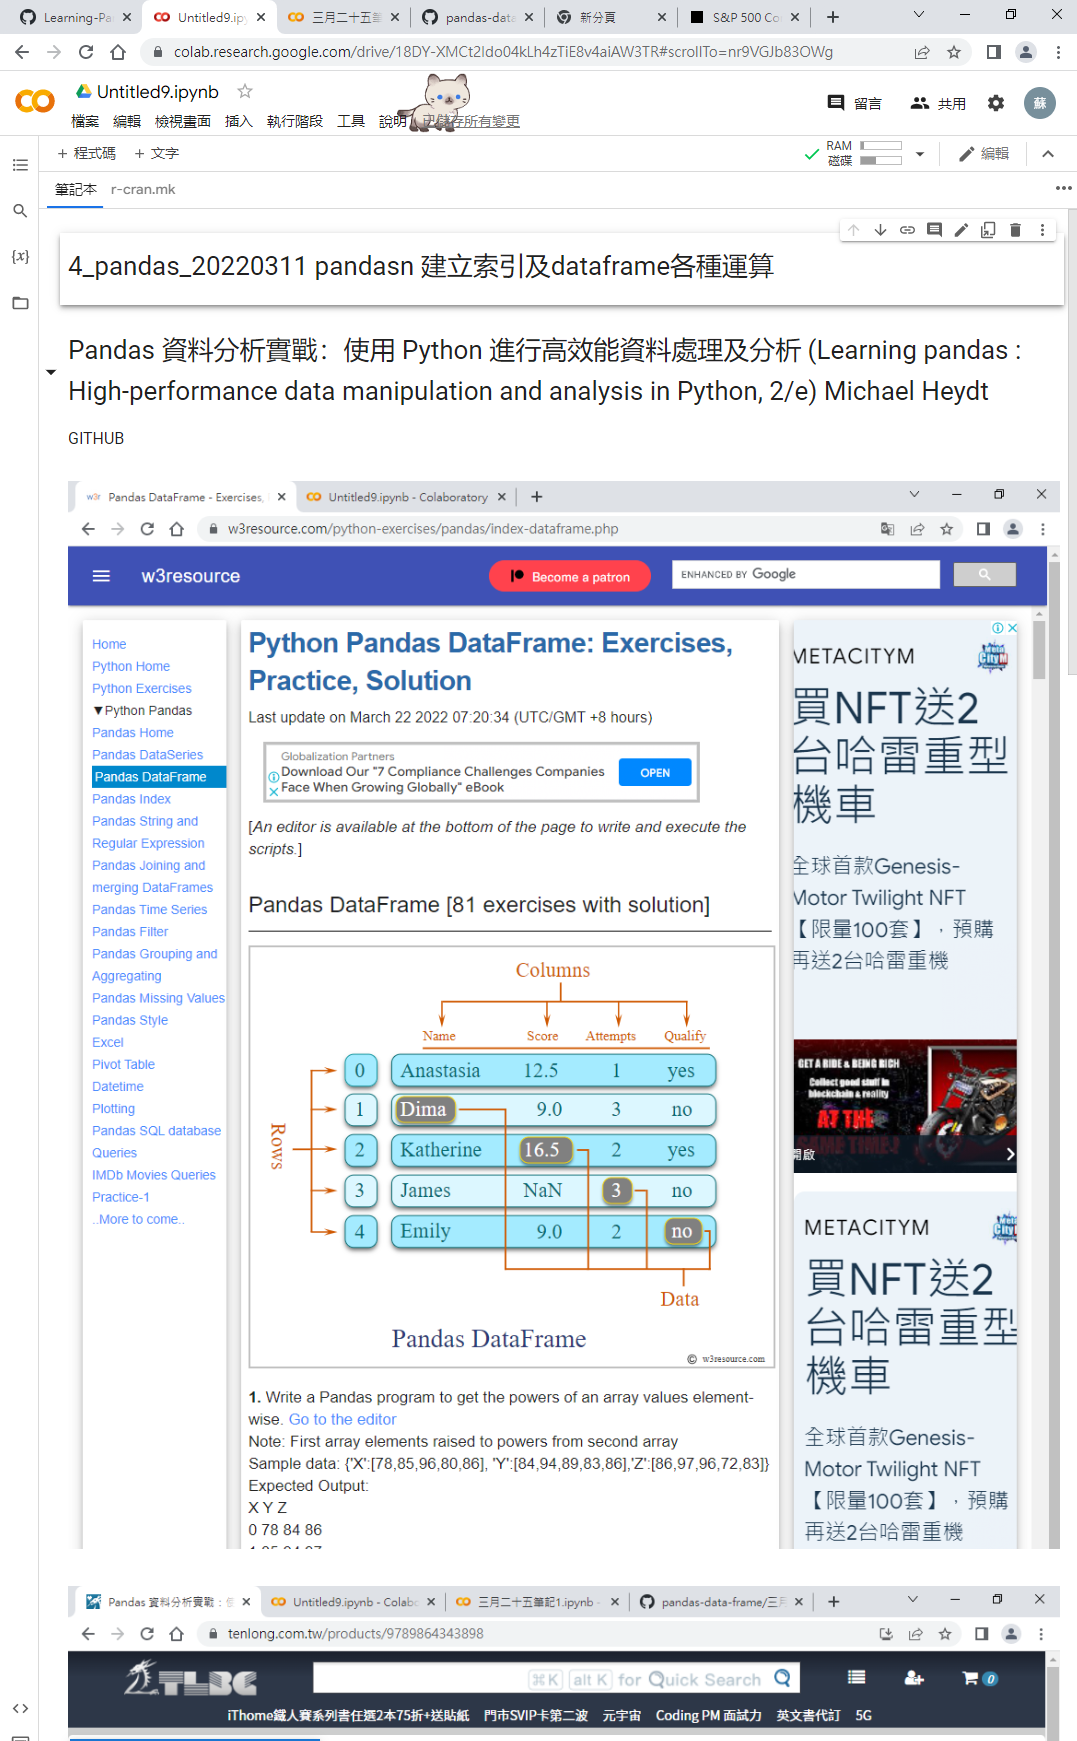

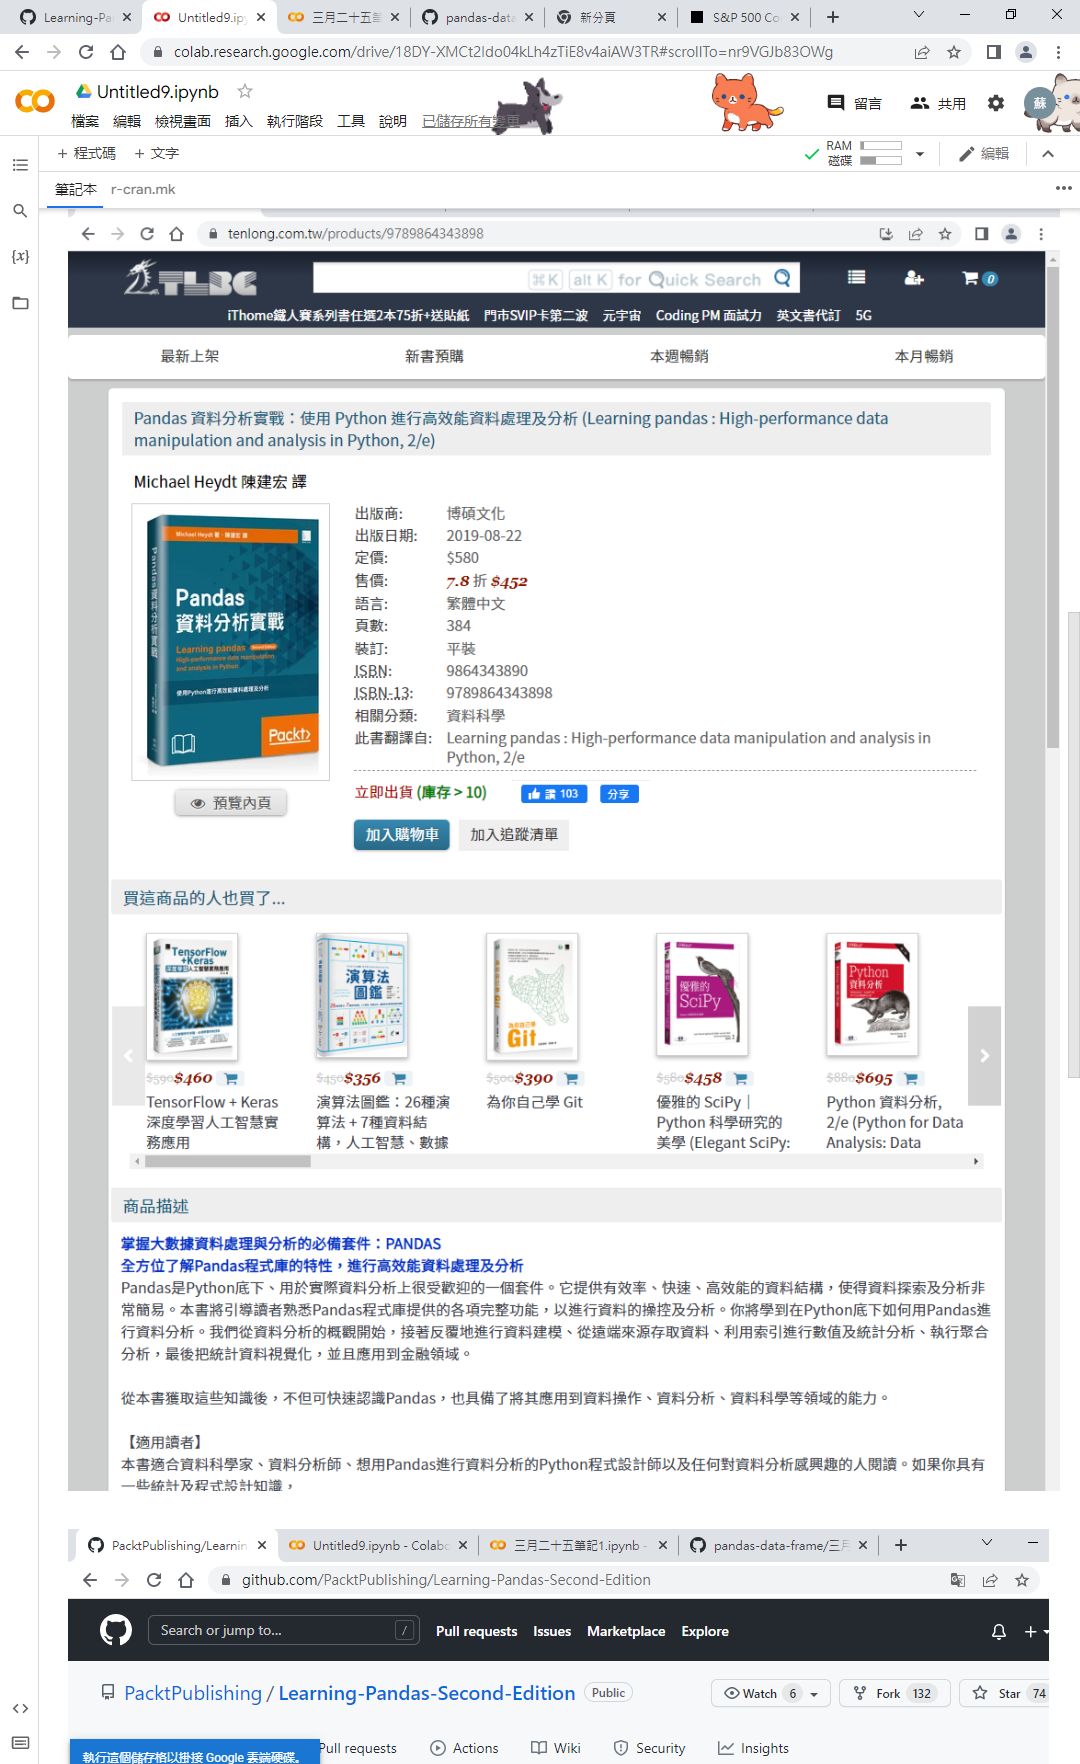

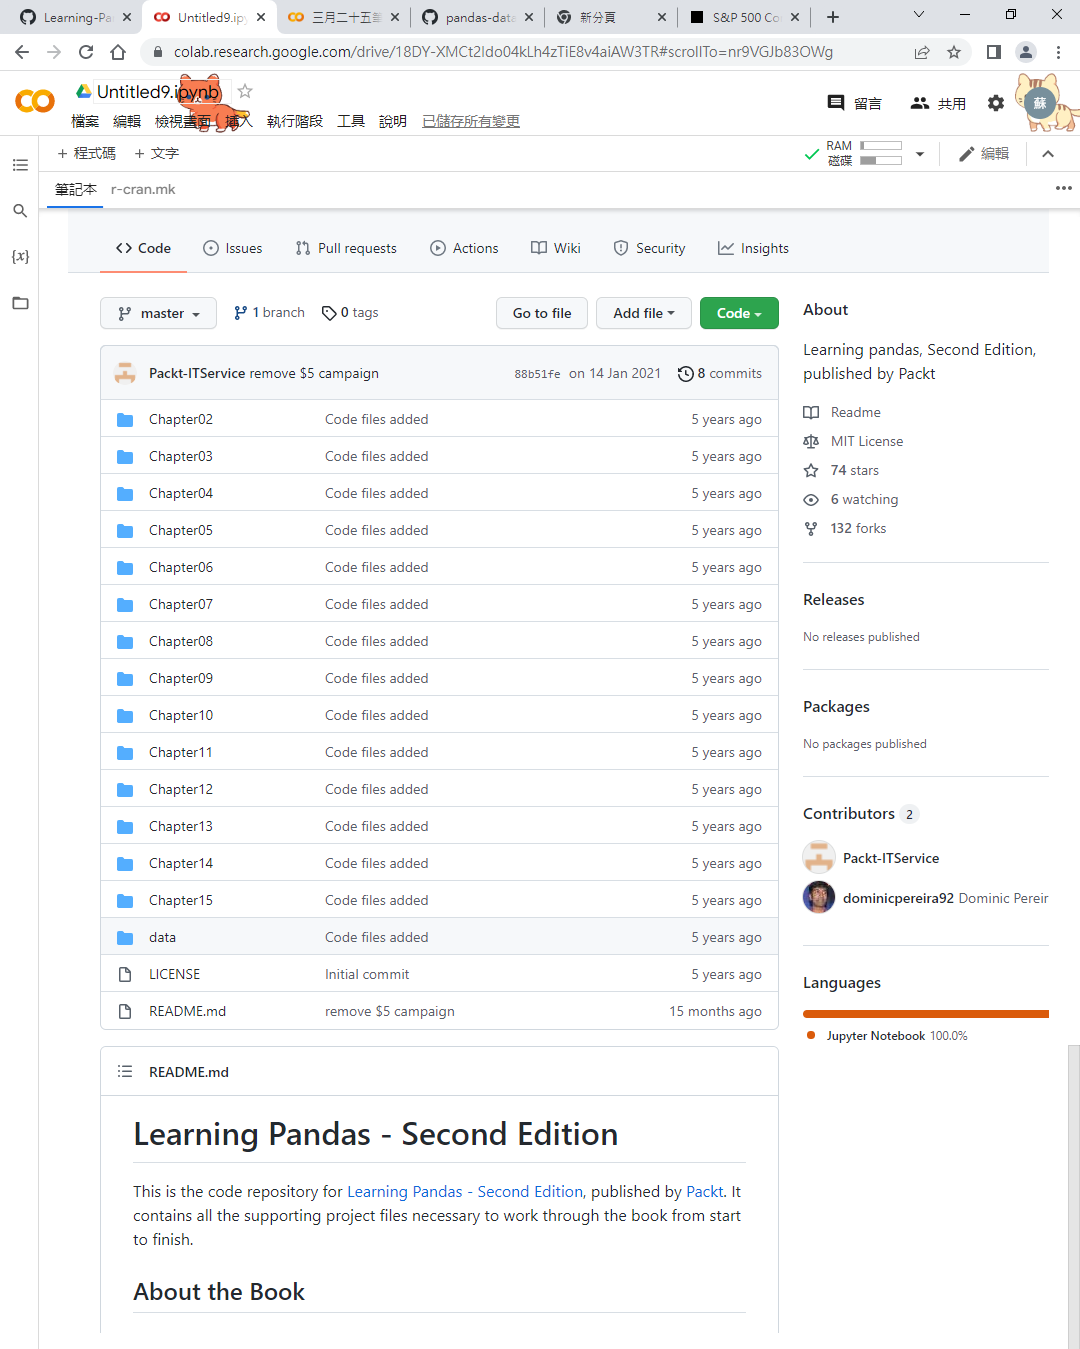

In [2]:
!wget https://raw.githubusercontent.com/PacktPublishing/Learning-Pandas-Second-Edition/master/data/msft.csv

--2022-04-21 07:10:50--  https://raw.githubusercontent.com/PacktPublishing/Learning-Pandas-Second-Edition/master/data/msft.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153109 (150K) [text/plain]
Saving to: ‘msft.csv’

msft.csv            100%[===================>] 149.52K  --.-KB/s    in 0.02s   

2022-04-21 07:10:50 (6.64 MB/s) - ‘msft.csv’ saved [153109/153109]



In [3]:
!head -n 5 msft.csv 

Date,Open,High,Low,Close,Volume
7/21/2014,83.46,83.53,81.81,81.93,2359300
7/18/2014,83.3,83.4,82.52,83.35,4020800
7/17/2014,84.35,84.63,83.33,83.63,1974000
7/16/2014,83.77,84.91,83.66,84.91,1755600


In [4]:
msft = pd.read_csv("./msft.csv")
msft[:5]

Date   Open   High    Low  Close   Volume
0  7/21/2014  83.46  83.53  81.81  81.93  2359300
1  7/18/2014  83.30  83.40  82.52  83.35  4020800
2  7/17/2014  84.35  84.63  83.33  83.63  1974000
3  7/16/2014  83.77  84.91  83.66  84.91  1755600
4  7/15/2014  84.30  84.38  83.20  83.58  1874700

In [10]:
# import numpy and pandas
import numpy as np
import pandas as pd

# used for dates
import datetime
from datetime import datetime, date

# Set some pandas options controlling output format
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 60)

# bring in matplotlib for graphics
import matplotlib.pyplot as plt
%matplotlib inline

# read in the data and print the first five rows
# use the Symbol column as the index, and 
# only read in columns in positions 0, 2, 3, 7
sp500 = pd.read_csv("/content/constituents.csv", 
                     )

# The importance of indexes

In [11]:
# create DataFame of random numbers and a key column
np.random.seed(123456)
df = pd.DataFrame({'foo':np.random.random(10000), 'key':range(100, 10100)})
df[:5]

foo  key
0  0.126970  100
1  0.966718  101
2  0.260476  102
3  0.897237  103
4  0.376750  104

In [12]:
# boolean select where key is 10099
df[df.key==10099]

foo    key
9999  0.272283  10099

In [13]:
# time the select
%timeit df[df.key==10099]

The slowest run took 4.27 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 5: 325 µs per loop


In [14]:
# move key to the index
df_with_index = df.set_index(['key'])
df_with_index[:5]

foo
key          
100  0.126970
101  0.966718
102  0.260476
103  0.897237
104  0.376750

In [15]:
# now can lookup with the index
df_with_index.loc[10099]

foo    0.272283
Name: 10099, dtype: float64

In [16]:
# and this is a lot faster
%timeit df_with_index.loc[10099]

The slowest run took 7.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 67.5 µs per loop


# The fundamental index type: Index

In [17]:
# show that the columns are actually an index
temps = pd.DataFrame({ "City": ["Missoula", "Philadelphia"],
                       "Temperature": [70, 80] })
temps

City  Temperature
0      Missoula           70
1  Philadelphia           80

In [18]:
# we can see columns is an index
temps.columns

Index(['City', 'Temperature'], dtype='object')

# Integer index labels using Int64Index and RangeIndex

In [20]:
# explicitly create an Int64Index
df_i64 = pd.DataFrame(np.arange(10, 20), index=np.arange(0, 10))
df_i64[:5]

0
0  10
1  11
2  12
3  13
4  14

In [21]:
# view the index
df_i64.index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [22]:
# by default we are given a RangeIndex
df_range = pd.DataFrame(np.arange(10, 15))
df_range[:5]

0
0  10
1  11
2  12
3  13
4  14

In [23]:
df_range.index

RangeIndex(start=0, stop=5, step=1)

# Floating point labels using Float64Index

In [24]:
# indexes using a Float64Index
df_f64 = pd.DataFrame(np.arange(0, 1000, 5), 
                      np.arange(0.0, 100.0, 0.5))
df_f64.iloc[:5] # need iloc to slice first five

0
0.0   0
0.5   5
1.0  10
1.5  15
2.0  20

In [25]:
df_f64.index

Float64Index([ 0.0,  0.5,  1.0,  1.5,  2.0,  2.5,  3.0,
               3.5,  4.0,  4.5,
              ...
              95.0, 95.5, 96.0, 96.5, 97.0, 97.5, 98.0,
              98.5, 99.0, 99.5],
             dtype='float64', length=200)

# Representing discrete intervals using IntervalIndex

In [26]:
# a DataFrame with an IntervalIndex
df_interval = pd.DataFrame({ "A": [1, 2, 3, 4]},
                    index = pd.IntervalIndex.from_breaks(
                        [0, 0.5, 1.0, 1.5, 2.0]))
df_interval

A
(0.0, 0.5]  1
(0.5, 1.0]  2
(1.0, 1.5]  3
(1.5, 2.0]  4

In [27]:
df_interval.index

IntervalIndex([(0.0, 0.5], (0.5, 1.0], (1.0, 1.5], (1.5, 2.0]], dtype='interval[float64, right]')

# Categorical values as an index: CategoricalIndex

In [42]:
from pandas.core.arrays import categorical
 # create a DataFrame with a Categorical coulmn
df_categorical = pd.DataFrame({'A': np.arange(6),
                               'B': list('aabbca')})
df_categorical['B'] = df_categorical['B'].astype('category',
                       categories=list('cab'))
 

TypeError: ignored

In [43]:
# shift the categorical column to the index
df_categorical = df_categorical.set_index('B')
df_categorical.index

Index(['a', 'a', 'b', 'b', 'c', 'a'], dtype='object', name='B')

In [44]:
# lookup values in category 'a'
df_categorical.loc['a']

A
B   
a  0
a  1
a  5

# Indexing by dates and times using DatetimeIndex

In [45]:
# create a DatetimeIndex from a date range
rng = pd.date_range('5/1/2017', periods=5, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2017-05-01 00:00:00    1.239792
2017-05-01 01:00:00   -0.400611
2017-05-01 02:00:00    0.718247
2017-05-01 03:00:00    0.430499
2017-05-01 04:00:00    1.155432
Freq: H, dtype: float64

In [46]:
ts.index

DatetimeIndex(['2017-05-01 00:00:00',
               '2017-05-01 01:00:00',
               '2017-05-01 02:00:00',
               '2017-05-01 03:00:00',
               '2017-05-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

# Indexing periods of time using PeriodIndex

In [47]:
# explicily create a PeriodIndex
periods = pd.PeriodIndex(['2017-1', '2017-2', '2017-3'], freq='M')
periods

PeriodIndex(['2017-01', '2017-02', '2017-03'], dtype='period[M]')

In [48]:
# use the index in a Series
period_series = pd.Series(np.random.randn(len(periods)), 
                          index=periods)
period_series

2017-01   -0.449276
2017-02    2.472977
2017-03   -0.716023
Freq: M, dtype: float64

# Creating and using an index with a Series or DataFrame

In [49]:
# create a DatetimeIndex
date_times = pd.DatetimeIndex(pd.date_range('5/1/2017', 
                                            periods=5, 
                                            freq='H'))
date_times

DatetimeIndex(['2017-05-01 00:00:00',
               '2017-05-01 01:00:00',
               '2017-05-01 02:00:00',
               '2017-05-01 03:00:00',
               '2017-05-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [50]:
# create a DataFrame using the index
df_date_times = pd.DataFrame(np.arange(0, len(date_times)), 
                             index=date_times)
df_date_times

0
2017-05-01 00:00:00  0
2017-05-01 01:00:00  1
2017-05-01 02:00:00  2
2017-05-01 03:00:00  3
2017-05-01 04:00:00  4

In [51]:
# set the index of a DataFrame
df_date_times.index = pd.DatetimeIndex(pd.date_range('6/1/2017', 
                                                     periods=5, 
                                                     freq='H'))
df_date_times

0
2017-06-01 00:00:00  0
2017-06-01 01:00:00  1
2017-06-01 02:00:00  2
2017-06-01 03:00:00  3
2017-06-01 04:00:00  4

# Selecting values using an index

In [52]:
# create a series
s = pd.Series(np.arange(0, 5), index=list('abcde'))
s

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [53]:
# lookup by index label
s['b']


1

In [54]:
# explicit lookup by label
s.loc['b']

1

In [55]:
# create a DataFrame with two columns
df = pd.DataFrame([ np.arange(10, 12), 
                    np.arange(12, 14)], 
                  columns=list('ab'), 
                  index=list('vw'))
df

a   b
v  10  11
w  12  13

In [56]:
# this returns the column 'a'
df['a']

v    10
w    12
Name: a, dtype: int64

In [57]:
# return the row 'w' by label
df.loc['w']

a    12
b    13
Name: w, dtype: int64

In [58]:
# slices the Series from index label b to d
s['b':'d']

b    1
c    2
d    3
dtype: int64

In [59]:
# this explicitly slices from label b to d
s.loc['b':'d']

b    1
c    2
d    3
dtype: int64

In [60]:
# and this looks up rows by label
s.loc[['a', 'c', 'e']]

a    0
c    2
e    4
dtype: int64

# Moving data to and from the index

In [61]:
# examine asome of the sp500 data
sp500[:5]

Symbol                 Name                  Sector
0    MMM           3M Company             Industrials
1    AOS      A.O. Smith Corp             Industrials
2    ABT  Abbott Laboratories             Health Care
3   ABBV          AbbVie Inc.             Health Care
4    ACN        Accenture plc  Information Technology

In [62]:
# reset the index which moves the values in the index to a column
index_moved_to_col = sp500.reset_index()
index_moved_to_col[:5]

index Symbol                 Name  \
0      0    MMM           3M Company   
1      1    AOS      A.O. Smith Corp   
2      2    ABT  Abbott Laboratories   
3      3   ABBV          AbbVie Inc.   
4      4    ACN        Accenture plc   

                   Sector  
0             Industrials  
1             Industrials  
2             Health Care  
3             Health Care  
4  Information Technology

In [63]:
# and now set the Sector column to be the index
index_moved_to_col.set_index('Sector')[:5]

index Symbol                 Name
Sector                                                   
Industrials                 0    MMM           3M Company
Industrials                 1    AOS      A.O. Smith Corp
Health Care                 2    ABT  Abbott Laboratories
Health Care                 3   ABBV          AbbVie Inc.
Information Technology      4    ACN        Accenture plc

In [64]:
# reindex to have MMM, ABBV, and FOO index labels
reindexed = sp500.reindex(index=['MMM', 'ABBV', 'FOO'])
# note that ABT and ACN are dropped and FOO has NaN values
reindexed

Symbol Name Sector
MMM     NaN  NaN    NaN
ABBV    NaN  NaN    NaN
FOO     NaN  NaN    NaN

In [65]:
# reindex columns
sp500.reindex(columns=['Price', 
                       'Book Value', 
                       'NewCol'])[:5]

Price  Book Value  NewCol
0    NaN         NaN     NaN
1    NaN         NaN     NaN
2    NaN         NaN     NaN
3    NaN         NaN     NaN
4    NaN         NaN     NaN

# Hierarchical indexing

In [66]:
# first, push symbol into a column
reindexed = sp500.reset_index()
# and now index sp500 by sector and symbol
multi_fi = reindexed.set_index(['Sector', 'Symbol'])
multi_fi[:5]

index                 Name
Sector                 Symbol                            
Industrials            MMM         0           3M Company
                       AOS         1      A.O. Smith Corp
Health Care            ABT         2  Abbott Laboratories
                       ABBV        3          AbbVie Inc.
Information Technology ACN         4        Accenture plc

In [67]:
# the index is a MultiIndex
type(multi_fi.index)

pandas.core.indexes.multi.MultiIndex

In [70]:
# this has two levels
len(multi_fi.index.levels)

2

In [71]:
# each index level is an index
multi_fi.index.levels[0]

Index(['Consumer Discretionary', 'Consumer Staples',
       'Energy', 'Financials', 'Health Care',
       'Industrials', 'Information Technology',
       'Materials', 'Real Estate',
       'Telecommunication Services', 'Utilities'],
      dtype='object', name='Sector')

In [72]:
# each index level is an index
multi_fi.index.levels[1]

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT',
       'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM',
       'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Symbol', length=505)

In [73]:
# values of index level 0
multi_fi.index.get_level_values(0)

Index(['Industrials', 'Industrials', 'Health Care',
       'Health Care', 'Information Technology',
       'Information Technology', 'Industrials',
       'Information Technology', 'Consumer Discretionary',
       'Information Technology',
       ...
       'Consumer Discretionary', 'Utilities',
       'Information Technology', 'Information Technology',
       'Financials', 'Industrials',
       'Consumer Discretionary', 'Health Care',
       'Financials', 'Health Care'],
      dtype='object', name='Sector', length=505)

In [74]:
# get all stocks that are Industrials
# note the result drops level 0 of the index
multi_fi.xs('Industrials')[:5]

index                  Name
Symbol                             
MMM         0            3M Company
AOS         1       A.O. Smith Corp
AYI         6     Acuity Brands Inc
ALK        17  Alaska Air Group Inc
ALLE       22              Allegion

In [75]:
# select rows where level 1 (Symbol) is ALLE
# note that the Sector level is dropped from the result
multi_fi.xs('ALLE', level=1)

index      Name
Sector                      
Industrials     22  Allegion

In [76]:
# Industrials, without dropping the level
multi_fi.xs('Industrials', drop_level=False)[:5]

index                  Name
Sector      Symbol                             
Industrials MMM         0            3M Company
            AOS         1       A.O. Smith Corp
            AYI         6     Acuity Brands Inc
            ALK        17  Alaska Air Group Inc
            ALLE       22              Allegion

In [77]:
# drill through the levels
multi_fi.xs('Industrials').xs('UPS')

index                      463
Name     United Parcel Service
Name: UPS, dtype: object

In [78]:
# drill through using tuples
multi_fi.xs(('Industrials', 'UPS'))

index                      463
Name     United Parcel Service
Name: (Industrials, UPS), dtype: object